In [1]:
# Import libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 
import seaborn as sns 

In [3]:
# Load the dataset 
data_url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv' 
df = pd.read_csv(data_url) 

In [4]:
# Print rows 
df.head() 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
# Print summary 
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
# Drop rows with missing values and select some features 
df = df.dropna() 
features = ['horsepower', 'weight', 'displacement', 'acceleration', 
'cylinders'] 
target = 'mpg' 

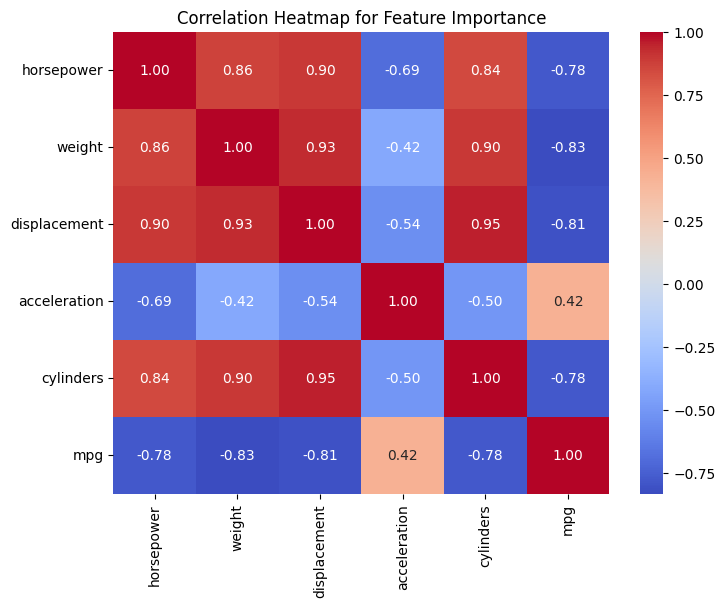

In [9]:
# Calculate correlation matrix 
correlation_matrix = df[features + [target]].corr() 
 
# Plot heatmap of feature importance 
plt.figure(figsize=(8, 6)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") 
plt.title('Correlation Heatmap for Feature Importance') 
plt.show() 

In [11]:
# Select features from the correlation matrix and use mpg as the target variable 
X = df[['horsepower', 'weight', 'displacement', 'cylinders']].values 
y = df['mpg'].values 

In [12]:
# Split the data into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [13]:
# Create a Linear Regression model 
model = LinearRegression() 
 
# Train the model 
model.fit(X_train, y_train) 

LinearRegression()

In [14]:
# Make predictions on the test set 
y_pred = model.predict(X_test) 

In [17]:
# Evaluate the model 
mse = mean_squared_error(y_test, y_pred) 
print(f"Mean Squared Error: {mse:.2f}") 

Mean Squared Error: 17.89


In [19]:
# Plot the true vs predicted mpg 
plt.figure(figsize=(8, 6)) 
plt.scatter(y_test, y_pred, alpha=0.75, color='blue', label='Predicted vs True') 
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Prediction Line')

# Calculate and plot prediction errors 
for (true_value, predicted_value) in zip(y_test, y_pred): 
    plt.plot([true_value, true_value], [true_value, predicted_value], color='gray', linestyle='-', linewidth=0.5) 
 
plt.xlabel("True MPG") 
plt.ylabel("Predicted MPG") 
plt.title("True MPG vs Predicted MPG with Prediction Errors") 
plt.legend() 
plt.grid(True) 
plt.show()df.info() 

SyntaxError: invalid syntax (1333289526.py, line 15)